In [50]:
import tensorflow as tf
from tensorflow import keras
from numpy import mean
from numpy import std
from numpy import dstack
from numpy import save, load
from pandas import read_csv
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense , Input ,concatenate
from keras.layers import Flatten
from keras.layers import Dropout
from keras import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.layers import LSTM, Conv1D, concatenate,GlobalMaxPooling1D,TimeDistributed, MaxPooling1D
# from keras.utils import to_categorical
from keras.layers import concatenate
from keras import regularizers

In [34]:
from google.colab import drive
drive.mount('/content/drive')

from google.colab import drive

drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/'  #change dir to your project folder

import numpy as np
x_train = np.load('gdrive/My Drive/dataset/dataset5/trainX.npy')
y_train = np.load('gdrive/My Drive/dataset/dataset5/trainy.npy')
x_test = np.load('gdrive/My Drive/dataset/dataset5/testX.npy')
y_test = np.load('gdrive/My Drive/dataset/dataset5/testy.npy')
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

Mounted at /content/drive
Mounted at /content/gdrive
(66542, 256, 6) (66542, 2) (7600, 256, 6) (7600, 2)


In [58]:
from sklearn.model_selection import train_test_split
X_training, X_validation, y_training, y_validation = train_test_split(x_train, y_train, test_size=0.20, random_state=42)
n_timesteps, n_features, n_outputs = x_train.shape[1], x_train.shape[2], y_train.shape[1]
validation_data=(X_validation, y_validation)

In [59]:
# from sklearn.model_selection import train_test_split
# X_training, X_validation, y_training, y_validation = train_test_split(x_train, y_train, test_size=0.20, random_state=42)


In [70]:
CNN_model= Sequential()
CNN_model.add(Conv1D(filters=32, kernel_size=3, strides=1, activation='relu', input_shape=(n_timesteps,n_features)))
CNN_model.add(MaxPooling1D(pool_size=2 ,strides=2))
CNN_model.add(Dropout(0.5))
CNN_model.add(Conv1D(filters=64, kernel_size=1, strides=1, activation='relu'))
CNN_model.add(Conv1D(filters=128, kernel_size=1, strides=1, activation='relu'))
# CNN_model.add(MaxPooling1D(pool_size=2 ,strides=2))
CNN_model.add(Dropout(0.5))
CNN_model.add(Conv1D(filters=128, kernel_size=1, strides=1, activation='relu'))
CNN_model.add(Flatten())
CNN_model.add(Dense(n_outputs, activation='relu'))
CNN_model.summary()

LSTM_model= Sequential()
LSTM_model.add(LSTM(512,input_shape=(n_timesteps,n_features),return_sequences=True))
LSTM_model.add(LSTM(256))
LSTM_model.add(Dropout(0.2))
LSTM_model.add(Dense(128, activation='relu'))
LSTM_model.add(Dense(n_outputs, activation='relu'))
LSTM_model.summary()

inputs = Input(shape=(n_timesteps,n_features))
mergedInput= concatenate([CNN_model(inputs),LSTM_model(inputs)])
out = Dense(n_outputs, activation='softmax')(mergedInput)
model3 = Model(inputs,out)
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#model3.layers[0].set_weights(LSTM_model.layers[4].get_weights())
model3.summary()
callbacks = [keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)]

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_59 (Conv1D)          (None, 2, 32)             6176      
                                                                 
 max_pooling1d_19 (MaxPoolin  (None, 1, 32)            0         
 g1D)                                                            
                                                                 
 dropout_26 (Dropout)        (None, 1, 32)             0         
                                                                 
 conv1d_60 (Conv1D)          (None, 1, 64)             2112      
                                                                 
 conv1d_61 (Conv1D)          (None, 1, 128)            8320      
                                                                 
 dropout_27 (Dropout)        (None, 1, 128)            0         
                                                     

In [71]:
# fit network
history = model2.fit(X_training, y_training, epochs=200, verbose=True, validation_data=(X_validation, y_validation), batch_size=100)

Epoch 1/200
533/533 [==============================] - 4s 8ms/step - loss: 0.0069 - accuracy: 0.9977 - val_loss: 0.1188 - val_accuracy: 0.9760
Epoch 2/200
533/533 [==============================] - 4s 8ms/step - loss: 0.0068 - accuracy: 0.9977 - val_loss: 0.1350 - val_accuracy: 0.9727
Epoch 3/200
533/533 [==============================] - 4s 8ms/step - loss: 0.0080 - accuracy: 0.9974 - val_loss: 0.1039 - val_accuracy: 0.9763
Epoch 4/200
533/533 [==============================] - 4s 8ms/step - loss: 0.0077 - accuracy: 0.9976 - val_loss: 0.1087 - val_accuracy: 0.9777
Epoch 5/200
533/533 [==============================] - 4s 8ms/step - loss: 0.0072 - accuracy: 0.9979 - val_loss: 0.1043 - val_accuracy: 0.9769
Epoch 6/200
533/533 [==============================] - 4s 8ms/step - loss: 0.0076 - accuracy: 0.9974 - val_loss: 0.1138 - val_accuracy: 0.9744
Epoch 7/200
533/533 [==============================] - 4s 8ms/step - loss: 0.0057 - accuracy: 0.9983 - val_loss: 0.1326 - val_accuracy: 0.9763

In [74]:
# evaluate model
loss, accuracy = model2.evaluate(X_validation, y_validation, verbose=False)
print("Validation Accuracy:  {:.4f}".format(accuracy))
loss, accuracy = model2.evaluate(x_test, y_test, verbose=False)
print("Testing Accuracy: {:.4f}".format(accuracy))

Validation Accuracy:  0.9776
Testing Accuracy: 0.8642


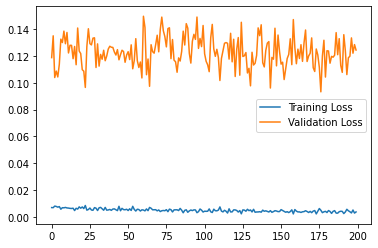

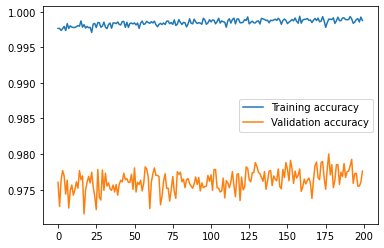

In [75]:
from matplotlib import pyplot as plt
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()
from matplotlib import pyplot as plt
plt.plot(history.history["accuracy"], label="Training accuracy")
plt.plot(history.history["val_accuracy"], label="Validation accuracy")
plt.legend()
plt.show()